
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA model is the following:

* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
files.upload()

Saving perrin-freres-monthly-champagne.csv to perrin-freres-monthly-champagne.csv


{'perrin-freres-monthly-champagne.csv': b'Month,Perrin Freres monthly champagne sales millions ?64-?72\r\n1964-01,2815\r\n1964-02,2672\r\n1964-03,2755\r\n1964-04,2721\r\n1964-05,2946\r\n1964-06,3036\r\n1964-07,2282\r\n1964-08,2212\r\n1964-09,2922\r\n1964-10,4301\r\n1964-11,5764\r\n1964-12,7312\r\n1965-01,2541\r\n1965-02,2475\r\n1965-03,3031\r\n1965-04,3266\r\n1965-05,3776\r\n1965-06,3230\r\n1965-07,3028\r\n1965-08,1759\r\n1965-09,3595\r\n1965-10,4474\r\n1965-11,6838\r\n1965-12,8357\r\n1966-01,3113\r\n1966-02,3006\r\n1966-03,4047\r\n1966-04,3523\r\n1966-05,3937\r\n1966-06,3986\r\n1966-07,3260\r\n1966-08,1573\r\n1966-09,3528\r\n1966-10,5211\r\n1966-11,7614\r\n1966-12,9254\r\n1967-01,5375\r\n1967-02,3088\r\n1967-03,3718\r\n1967-04,4514\r\n1967-05,4520\r\n1967-06,4539\r\n1967-07,3663\r\n1967-08,1643\r\n1967-09,4739\r\n1967-10,5428\r\n1967-11,8314\r\n1967-12,10651\r\n1968-01,3633\r\n1968-02,4292\r\n1968-03,4154\r\n1968-04,4121\r\n1968-05,4647\r\n1968-06,4753\r\n1968-07,3965\r\n1968-08,1723\

In [ ]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [ ]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [ ]:
# Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [ ]:
# Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [ ]:
df.drop(105,axis=0,inplace=True)

In [ ]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [ ]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [ ]:
df.set_index('Month',inplace=True)

In [ ]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [ ]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


## Step 2: Visualize the Data

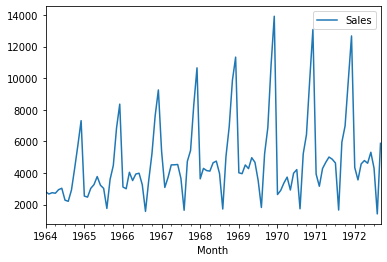

In [ ]:
df.plot()

In [ ]:
# Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
test_result=adfuller(df['Sales'])

In [ ]:
test_result

(-1.8335930563276193,
 0.36391577166024686,
 11,
 93,
 {'1%': -3.502704609582561,
  '10%': -2.583636712914788,
  '5%': -2.8931578098779522},
 1478.4633060594724)

In [ ]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [ ]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [ ]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [ ]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [ ]:
# Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(H0), reject the null hypothesis. Data has no unit root and is stationary


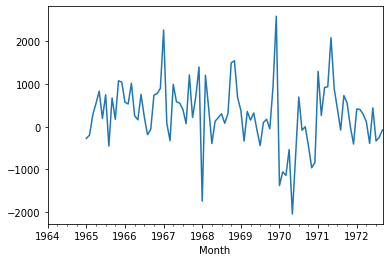

In [ ]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model
![image.png](attachment:image.png)

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

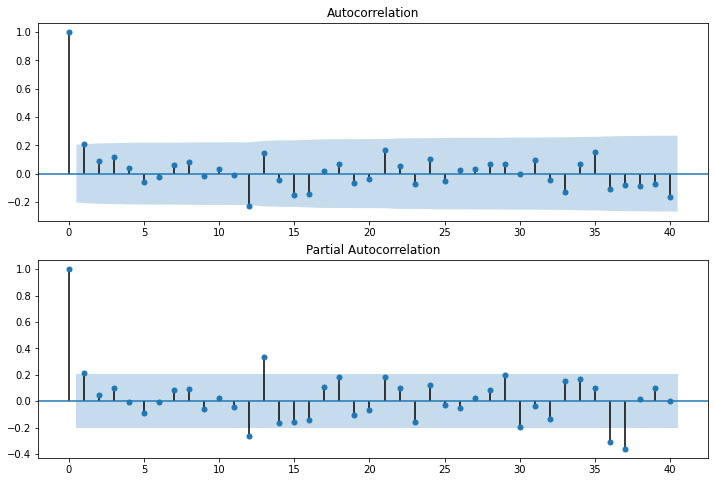

In [64]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Wed, 18 Mar 2020   AIC                           1910.251
Time:                        13:40:32   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7838     12.405      1.837      0.069      -1.530      47.098
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

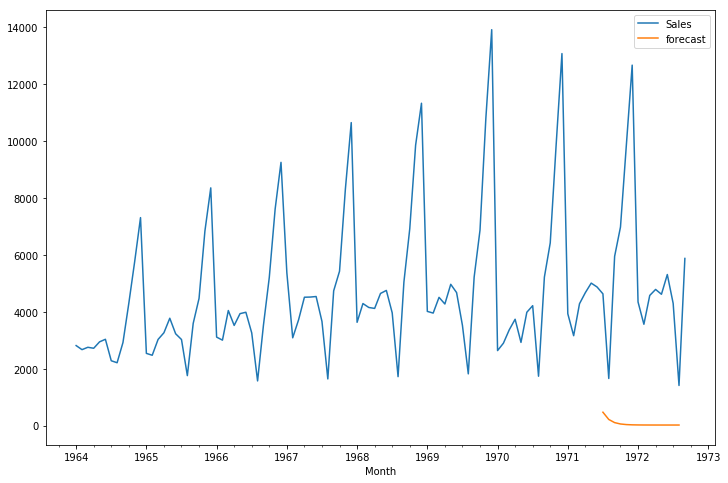

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\krish.naik\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


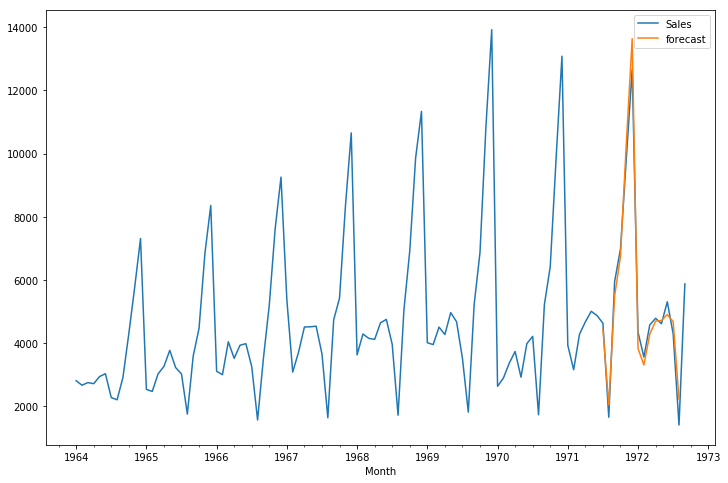

In [ ]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_datest_df.tail()

,Sales,Sales First Difference,forecast,Seasonal First Difference
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [ ]:
future_df=pd.concat([df,future_datest_df])

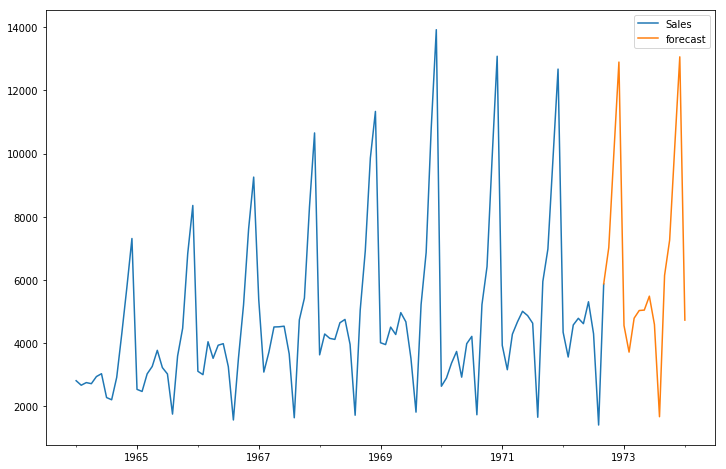

In [ ]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

In [63]:
future_df.tail(30)

,Sales,Sales First Difference,Seasonal First Difference,forecast
1972-03-01,4577.0,1013.0,291.0,NaN
1972-04-01,4788.0,211.0,112.0,NaN
1972-05-01,4618.0,-170.0,-392.0,NaN
1972-06-01,5312.0,694.0,438.0,NaN
1972-07-01,4298.0,-1014.0,-335.0,NaN
1972-08-01,1413.0,-2885.0,-246.0,NaN
1972-09-01,5877.0,4464.0,-74.0,5878.711792
1972-10-01,NaN,NaN,NaN,7024.262974
1972-11-01,NaN,NaN,NaN,9996.419931
1972-12-01,NaN,NaN,NaN,12892.153157
